# HW 1

ISE-530 Homework I: Chapters I and II of Cottle-Thapa. Due 11:59 PM Wednesday September 09

- Exercises 1.4, 1.10, 1.11, and 1.15.
- Exercises 2.1, 2.6, 2.12, and 2.15.

In [1]:
%load_ext nb_black
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 300

import numpy as np
import cvxpy as cp
from collections import namedtuple

<IPython.core.display.Javascript object>

---
## Chapter I

### 1.4

Consider the integer linear program

$$
\begin{align}
    \text{maximize } &x + 2y \\
    \text{subject to } &3x + 4y \leq 12 \\
    &−x + 2y \leq 4 \\
    &\text{and } x \geq 0, y \geq 0 \\
    &\text{with } x, y \text{ integers.} \\
\end{align}
$$

In [2]:
# Create two scalar optimization variables.
x = cp.Variable((1,), integer=True)
y = cp.Variable((1,), integer=True)

# Create two constraints.
constraints = [
    3 * x + 4 * y <= 12,
    -x + 2 * y <= 2,
    x >= 0,
    y >= 0,
]

# Form objective.
obj = cp.Maximize(x + 2 * y)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")

Status: optimal
The optimal value is: 4.0
The optimal solution is: x = [4.0]


<IPython.core.display.Javascript object>

**(a) The optimal solution to the linear program (without the integer restrictions) is x = 1.6, y = 1.8. Show that rounding this solution leads to an infeasible solution.**

\begin{align}
    \text{Constraint }1: 3(x=\lceil{1.6}\rceil) + 4(y=\lceil{1.8}\rceil) = 14 \not\leq 12
\end{align}

In [3]:
np.array([3, 4]) @ np.array([np.round(1.6), np.round(1.8)])

14.0

<IPython.core.display.Javascript object>

Constraint 1 is violated and hence, solution is infeasible.

\begin{align}
    \text{Constraint }2: -1(x=\lceil{1.6}\rceil) + 2(y=\lceil{1.8}\rceil) = 2 \leq 2
\end{align}

In [4]:
np.array([-1, 2]) @ np.array([np.round(1.6), np.round(1.8)])

2.0

<IPython.core.display.Javascript object>

**(b) Starting from x = 0, y = 0, systematically enumerate all possible integer solutions and pick an optimal solution. Is it unique?**

In [5]:
Solution = namedtuple(typename="Solution", field_names=["x", "y", "value"])
xy_range, feasible_solutions = 5, []
for x_candidate, y_candidate in [
    (x, y) for y in range(xy_range) for x in range(xy_range)
]:
    constraint_1 = 3 * x_candidate + 4 * y_candidate <= 12
    constraint_2 = -x_candidate + 2 * y_candidate <= 2
    is_feasible = constraint_1 & constraint_2
    print(
        f"(x={x_candidate}, y={y_candidate}) feasible?: {is_feasible}, ",
        f"Solution: {x_candidate + 2 * y_candidate}"
        if is_feasible
        else (
            "Both constraints violated."
            if (not constraint_1) & (not constraint_2)
            else "Constraint 1 violated."
            if (not constraint_1)
            else "Constraint 2 violated."
        ),
    )
    if is_feasible:
        feasible_solutions.append(
            Solution(x=x_candidate, y=y_candidate, value=x_candidate + 2 * y_candidate)
        )

(x=0, y=0) feasible?: True,  Solution: 0
(x=1, y=0) feasible?: True,  Solution: 1
(x=2, y=0) feasible?: True,  Solution: 2
(x=3, y=0) feasible?: True,  Solution: 3
(x=4, y=0) feasible?: True,  Solution: 4
(x=0, y=1) feasible?: True,  Solution: 2
(x=1, y=1) feasible?: True,  Solution: 3
(x=2, y=1) feasible?: True,  Solution: 4
(x=3, y=1) feasible?: False,  Constraint 1 violated.
(x=4, y=1) feasible?: False,  Constraint 1 violated.
(x=0, y=2) feasible?: False,  Constraint 2 violated.
(x=1, y=2) feasible?: False,  Constraint 2 violated.
(x=2, y=2) feasible?: False,  Constraint 1 violated.
(x=3, y=2) feasible?: False,  Constraint 1 violated.
(x=4, y=2) feasible?: False,  Constraint 1 violated.
(x=0, y=3) feasible?: False,  Constraint 2 violated.
(x=1, y=3) feasible?: False,  Both constraints violated.
(x=2, y=3) feasible?: False,  Both constraints violated.
(x=3, y=3) feasible?: False,  Both constraints violated.
(x=4, y=3) feasible?: False,  Constraint 1 violated.
(x=0, y=4) feasible?: Fa

<IPython.core.display.Javascript object>

In [6]:
print(
    f"Optimal Solution: {sorted(feasible_solutions, key=lambda x:x.value, reverse=True)[0]}"
)

Optimal Solution: Solution(x=4, y=0, value=4)


<IPython.core.display.Javascript object>

The optimal solution is not unqiue since (x=2, y=1) yields 4 as well.

**(c) Replace the first inequality by 3x + 4y ≤ 8; the optimal solution to the linear program (without the integer restrictions) now changes to x = 0.8, y = 1.4. Show that rounding now leads to a feasible solution.**

In [7]:
# Create two scalar optimization variables.
x = cp.Variable((1,), integer=True)
y = cp.Variable((1,), integer=True)

# Create two constraints.
constraints = [
    3 * x + 4 * y <= 8,
    -x + 2 * y <= 2,
    x >= 0,
    y >= 0,
]

# Form objective.
obj = cp.Maximize(x + 2 * y)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")

Status: optimal
The optimal value is: 3.0
The optimal solution is: x = [1.0]


<IPython.core.display.Javascript object>

\begin{align}
    \text{Constraint }1: 3(x=\lceil{0.8}\rceil) + 4(y=\lfloor{1.4}\rfloor) = 7 \leq 8
\end{align}

In [8]:
np.array([3, 4]) @ np.array([np.round(0.8), np.round(1.4)])

7.0

<IPython.core.display.Javascript object>

\begin{align}
    \text{Constraint }2: -1(x=\lceil{0.8}\rceil) + 2(y=\lfloor{1.4}\rfloor) = 1 \leq 2
\end{align}

In [9]:
np.array([-1, 2]) @ np.array([np.round(0.8), np.round(1.4)])

1.0

<IPython.core.display.Javascript object>

Since both constraints are fulfilled, the solution is feasible.

**(d) Enumerate all possible feasible integer solutions to the problem as reformulated in (c) and show that the above integer solution is the optimal integer solution.**

In [10]:
Solution = namedtuple(typename="Solution", field_names=["x", "y", "value"])
xy_range, feasible_solutions = 5, []
for x_candidate, y_candidate in [
    (x, y) for y in range(xy_range) for x in range(xy_range)
]:
    constraint_1 = 3 * x_candidate + 4 * y_candidate <= 8
    constraint_2 = -x_candidate + 2 * y_candidate <= 2
    is_feasible = constraint_1 & constraint_2
    print(
        f"(x={x_candidate}, y={y_candidate}) feasible?: {is_feasible}, ",
        f"Solution: {x_candidate + 2 * y_candidate}"
        if is_feasible
        else (
            "Both constraints violated."
            if (not constraint_1) & (not constraint_2)
            else "Constraint 1 violated."
            if (not constraint_1)
            else "Constraint 2 violated."
        ),
    )
    if is_feasible:
        feasible_solutions.append(
            Solution(x=x_candidate, y=y_candidate, value=x_candidate + 2 * y_candidate)
        )

(x=0, y=0) feasible?: True,  Solution: 0
(x=1, y=0) feasible?: True,  Solution: 1
(x=2, y=0) feasible?: True,  Solution: 2
(x=3, y=0) feasible?: False,  Constraint 1 violated.
(x=4, y=0) feasible?: False,  Constraint 1 violated.
(x=0, y=1) feasible?: True,  Solution: 2
(x=1, y=1) feasible?: True,  Solution: 3
(x=2, y=1) feasible?: False,  Constraint 1 violated.
(x=3, y=1) feasible?: False,  Constraint 1 violated.
(x=4, y=1) feasible?: False,  Constraint 1 violated.
(x=0, y=2) feasible?: False,  Constraint 2 violated.
(x=1, y=2) feasible?: False,  Both constraints violated.
(x=2, y=2) feasible?: False,  Constraint 1 violated.
(x=3, y=2) feasible?: False,  Constraint 1 violated.
(x=4, y=2) feasible?: False,  Constraint 1 violated.
(x=0, y=3) feasible?: False,  Both constraints violated.
(x=1, y=3) feasible?: False,  Both constraints violated.
(x=2, y=3) feasible?: False,  Both constraints violated.
(x=3, y=3) feasible?: False,  Both constraints violated.
(x=4, y=3) feasible?: False,  Con

<IPython.core.display.Javascript object>

In [11]:
print(
    f"Optimal Solution: {sorted(feasible_solutions, key=lambda x:x.value, reverse=True)[0]}"
)

Optimal Solution: Solution(x=1, y=1, value=3)


<IPython.core.display.Javascript object>

Rounding (x=0.8, y=1.4) to the nearest integers (x=1, y=1), leads to a unique optimal solution of 3.

**(e) For the integer linear program**

$$
\begin{align}
    \text{maximize } &x + 2.5y \\
    \text{subject to } &2x + 4.5y \leq 6 \\
    &−x + 2.0y \leq 4 \\
    &\text{and } x \geq 0, y \geq 0 \\
    &\text{with } x, y \text{ integers} \\
\end{align}
$$

**the optimal solution is x = 0, y = 4/3. Rounding this results in the feasible solution x = 0, y = 1. Show that this is not optimal by finding the optimal feasible integer solution.**

In [12]:
# Create two scalar optimization variables.
x = cp.Variable((1,), integer=False)
y = cp.Variable((1,), integer=False)

# Create two constraints.
constraints = [
    2 * x + 4.5 * y <= 6,
    -x + 2 * y <= 4,
    x >= 0,
    y >= 0,
]

# Form objective.
obj = cp.Maximize(x + 2.5 * y)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")

Linear Programming Solution
Status: optimal
The optimal value is: 3.33
The optimal solution is: x = [0.0]


<IPython.core.display.Javascript object>

In [13]:
# Create two scalar optimization variables.
x = cp.Variable((1,), integer=True)
y = cp.Variable((1,), integer=True)

# Create two constraints.
constraints = [
    2 * x + 4.5 * y <= 6,
    -x + 2 * y <= 4,
    x >= 0,
    y >= 0,
]

# Form objective.
obj = cp.Maximize(x + 2.5 * y)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

print("Integer Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")

Integer Linear Programming Solution
Status: optimal
The optimal value is: 3.0
The optimal solution is: x = [3.0]


<IPython.core.display.Javascript object>

In [14]:
print("Enumeration of possible solutions")
print("=" * 30)
Solution = namedtuple(typename="Solution", field_names=["x", "y", "value"])
xy_range, feasible_solutions = 5, []
for x_candidate, y_candidate in [
    (x, y) for y in range(xy_range) for x in range(xy_range)
]:
    constraint_1 = 2 * x_candidate + 4.5 * y_candidate <= 6
    constraint_2 = -x_candidate + 2 * y_candidate <= 4
    is_feasible = constraint_1 & constraint_2
    print(
        f"(x={x_candidate}, y={y_candidate}) feasible?: {is_feasible}, ",
        f"Solution: {x_candidate + 2.5 * y_candidate}"
        if is_feasible
        else (
            "Both constraints violated."
            if (not constraint_1) & (not constraint_2)
            else "Constraint 1 violated."
            if (not constraint_1)
            else "Constraint 2 violated."
        ),
    )
    if is_feasible:
        feasible_solutions.append(
            Solution(x=x_candidate, y=y_candidate, value=x_candidate + 2 * y_candidate)
        )

Enumeration of possible solutions
(x=0, y=0) feasible?: True,  Solution: 0.0
(x=1, y=0) feasible?: True,  Solution: 1.0
(x=2, y=0) feasible?: True,  Solution: 2.0
(x=3, y=0) feasible?: True,  Solution: 3.0
(x=4, y=0) feasible?: False,  Constraint 1 violated.
(x=0, y=1) feasible?: True,  Solution: 2.5
(x=1, y=1) feasible?: False,  Constraint 1 violated.
(x=2, y=1) feasible?: False,  Constraint 1 violated.
(x=3, y=1) feasible?: False,  Constraint 1 violated.
(x=4, y=1) feasible?: False,  Constraint 1 violated.
(x=0, y=2) feasible?: False,  Constraint 1 violated.
(x=1, y=2) feasible?: False,  Constraint 1 violated.
(x=2, y=2) feasible?: False,  Constraint 1 violated.
(x=3, y=2) feasible?: False,  Constraint 1 violated.
(x=4, y=2) feasible?: False,  Constraint 1 violated.
(x=0, y=3) feasible?: False,  Both constraints violated.
(x=1, y=3) feasible?: False,  Both constraints violated.
(x=2, y=3) feasible?: False,  Constraint 1 violated.
(x=3, y=3) feasible?: False,  Constraint 1 violated.
(

<IPython.core.display.Javascript object>

In [15]:
print(
    f"Optimal Solution: {sorted(feasible_solutions, key=lambda x:x.value, reverse=True)[0]}"
)

Optimal Solution: Solution(x=3, y=0, value=3)


<IPython.core.display.Javascript object>

x=0, y=1 is indeed a feasible solution, however it's not optimal, since it yields 2.5 while x=3, y=0 yields 3.

### 1.10

A farmer purchases feed mix for his cattle from a local company which
provides five types of mixes with different nutrient levels. The farmer has
different requirements for his cattle feed mix than those provided by the
company and would like to create a blend of these five different mixes to
meet or exceed his requirements at a minimum cost. Formulate an LP to
do this based on the data below

<img src="./assets/hw1-1_10.png" />

Define:

\begin{equation*}
    \underbrace{
        A = 
        \begin{pmatrix}
        20 & 30 & 8 & 35 & 15 \\
        10 & 5 & 25 & 18 & 40 \\
        12 & 35 & 10 & 5 & 10 \\
        \end{pmatrix}
    }_{\text{Detached Coefficient Matrix}}
    \,\,,\,\,
    \underbrace{
        \mathbf{x} = 
        \begin{pmatrix}
        x_1 \\
        x_2 \\
        x_3 \\
        x_4 \\
        x_5 \\
        \end{pmatrix}
    }_{\text{Vector representing the percentage of each mix}}
    \,\,,\,\,
    \underbrace{
        \mathbf{b} = 
        \begin{pmatrix}
        25 \\
        25 \\
        15 \\
        \end{pmatrix}
    }_{\text{Constraints}}
    \,\,,\,\,
    \underbrace{
        \mathbf{c} = 
        \begin{pmatrix}
        0.50 \\
        1.10 \\
        0.55 \\
        0.75 \\
        1.25 \\
        \end{pmatrix}
    }_{\text{Coefficients for Objective function}}
\end{equation*}

Linear Program:

\begin{align}
    \text{minimize } &\mathbf{c}^\top \mathbf{x} \\
    \text{subject to } &A\mathbf{x} \geq \mathbf{b} \\
    &\text{and } \mathbf{x} \geq 0\\
\end{align}

In [16]:
# Create one vector optimization variable.
x = cp.Variable((5,), integer=False)

# Create constraints.
constraints = [
    np.array([[20, 30, 8, 35, 15], [10, 5, 25, 18, 40], [12, 35, 10, 5, 10]]) @ x
    >= np.array([25, 25, 15]),
    x >= 0,
]

# Form objective.
obj = cp.Minimize(np.array([0.5, 1.10, 0.55, 0.75, 1.25]) @ x)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")
print(
    f"Mix Percentages: {' | '.join(['Mix ' + str(i+1) + ' - ' + str(abs(np.round(x_i, 2))) + 'lb' for i, x_i in enumerate(x.value)])}"
)

Linear Programming Solution
Status: optimal
The optimal value is: 0.81
The optimal solution is: x = [0.68, -0.0, 0.59, 0.19, 0.0]
Mix Percentages: Mix 1 - 0.68lb | Mix 2 - 0.0lb | Mix 3 - 0.59lb | Mix 4 - 0.19lb | Mix 5 - 0.0lb


<IPython.core.display.Javascript object>

### 1.11

CT Capital provides capital for home mortgages, auto loans, and personal
loans. Their home mortgage loans are of 30 year fixed rates of three types:
Jumbo loans (greater than $729,000), Conforming loans, and 2nd Mortgages (or Home Equity Loans, abbreviated HEL). The annual interest
rates for these loans, are as follows:

$$
\begin{align}
    \text{Jumbo}\, &\, 4.875\% \\
    \text{Conforming}\, &\, 4.375\% \\
    \text{HEL}\, &\, 5.750\% \\
    \text{Auto}\, &\, 6.000\% \\
    \text{Personal}\, &\, 8.500\% \\
\end{align}
$$

Formulate an LP model to help CT Capital maximize the return from interest on these loans subject to the following:
- The total capital available for all loans is \$400 million.
- The Conforming loans, which have the lowest risk, should be at least 70% of the three home-based loans.
- HELs should be no more than 10% of the home-based loans.
- The home-based loans should be at least 80% of all loans.
- Personal loans should not be more than 30% of the auto and personal loans.

Define:

\begin{equation*}
    \underbrace{
        \mathbf{x} = 
        \begin{pmatrix}
        x_{\text{jumbo}} \\ 
        x_{\text{conforming}} \\ 
        x_{\text{hel}} \\ 
        x_{\text{auto}} \\ 
        x_{\text{personal}}
        \end{pmatrix}
    }_{\text{Vector representing the dollar amount to be invested in each loan subject}}
    \,\,,\,\,
    \underbrace{
        \mathbf{c} = 
        \begin{pmatrix}
        0.04875 \\
        0.04375 \\
        0.05750 \\
        0.06000 \\
        0.08500 \\
        \end{pmatrix}
    }_{\text{Coefficients for Objective function}}
\end{equation*}

Linear Program:

\begin{align}
    \text{maximize } &\mathbf{c}^\top \mathbf{x} \\
    \text{subject to } &\mathbf{1}^\top\mathbf{x} \leq 400,000,000 \\
    &\begin{pmatrix} -0.7 & 0.3 & -0.7 & 0 & 0 \end{pmatrix} \cdot \mathbf{x} \geq 0 \\
    &\begin{pmatrix} -0.1 & 0.1 & 0.9 & 0 & 0 \end{pmatrix} \cdot \mathbf{x} \leq 0 \\
    &\begin{pmatrix} 0.2 & 0.2 & 0.2 & -0.8 & -0.8 \end{pmatrix} \cdot \mathbf{x} \geq 0 \\
    &\begin{pmatrix} 0 & 0 & 0 & -0.3 & 0.7 \end{pmatrix} \cdot \mathbf{x} \leq 0 \\
    &\text{and } \mathbf{x} \geq 0\\
\end{align}

In [17]:
# Create one vector optimization variable.
x = cp.Variable((5,), integer=False)

# Create constraints.
constraints = [
    np.array([1, 1, 1, 1, 1]) @ x
    <= 400000000,  # The total capital available for all loans is $400 million.
    np.array([-0.7, 0.3, -0.7]) @ x[:3]
    >= 0,  # The Conforming loans, which have the lowest risk, should be at least 70% of the three home-based loans.
    np.array([-0.1, -0.1, 0.9]) @ x[:3]
    <= 0,  # HELs should be no more than 10% of the home-based loans.
    np.array([0.2, 0.2, 0.2, -0.8, -0.8]) @ x
    >= 0,  # The home-based loans should be at least 80% of all loans.
    np.array([-0.3, 0.7]) @ x[3:]
    <= 0,  # Personal loans should not be more than 30% of the auto and personal loans.
    x >= 0,
]

# Form objective.
obj = cp.Maximize(np.array([0.04875, 0.04375, 0.05750, 0.06000, 0.08500]) @ x)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")
print(
    f"Amount to allocate in each asset: {' | '.join([asset + ' - $' + str(abs(np.round(x_i, 2))) for asset, x_i in zip(['Jumbo', 'Conforming', 'HEL', 'Auto', 'Personal'], x.value)])}"
)

Linear Programming Solution
Status: optimal
The optimal value is: 20160000.0
The optimal solution is: x = [64000000.0, 224000000.0, 32000000.0, 56000000.0, 24000000.0]
Amount to allocate in each asset: Jumbo - $64000000.0 | Conforming - $224000000.0 | HEL - $32000000.0 | Auto - $56000000.0 | Personal - $24000000.0


<IPython.core.display.Javascript object>

### 1.15

A food manufacturing company makes three products called Mix A (MA),
Mix B (MB), and Mix C (MC) using four blending machines of different
sizes called Mini, Small, Medium and Large. (There is one machine of
each size. The machines differ only in their capacity.) Because they are
used in the company’s other manufacturing operations (which are not
part of this problem), the scheduling people have limited the annual use
of these machines for making MA, MB AND MC to 200 hours each for
the two smaller machines and 100 hours each for the two larger machines.
The estimated annual demands for MA, MB and MC are 190,000 pounds,
250,000 pounds and 75,000 pounds, respectively, and the company intends
to meet these demands. The times required for manufacturing batches of
MA, MB, and MC are 50 minutes, 30 minutes and 45 minutes, respectively, regardless of which machine is being used for the blending.
The cost of producing each of the three products on each of the four
blenders as well as the loading capacity of each product on each blender
is given in the following table: 

<img src="./assets/hw1-1_15.png" />

(a) Formulate a linear program that would help the company to minimize the cost of manufacturing these three products while satisfying the given constraints.

Define:

\begin{equation*}
    \underbrace{
        A = 
        \begin{pmatrix}
        190& 795& 990& 1975& 0& 0& 0& 0& 0& 0& 0& 0 \\
        0& 0& 0& 0& 200& 800& 1000& 2000& 0& 0& 0& 0 \\
        0& 0& 0& 0& 0& 0& 0& 0& 200& 820& 1015& 2025 \\
        -50 / 60& 0& 0& 0& -30 / 60& 0& 0& 0& -45 / 60& 0& 0& 0 \\
        0& -50 / 60& 0& 0& 0& -30 / 60& 0& 0& 0& -45 / 60& 0& 0 \\
        0& 0& -50 / 60& 0& 0& 0& -30 / 60& 0& 0& 0& -45 / 60& 0 \\
        0& 0& 0& -50 / 60& 0& 0& 0& -30 / 60& 0& 0& 0& -45 / 60 \\
        \end{pmatrix}
    }_{\text{Detached Coefficient Matrix}}
    \,\,,\,\,
    \underbrace{
        \mathbf{x} = 
        \begin{pmatrix}
        x_{\text{A, mini}} \\
        x_{\text{A, small}} \\
        x_{\text{A, medium}} \\
        x_{\text{A, large}} \\
        x_{\text{B, mini}} \\
        x_{\text{B, small}} \\
        x_{\text{B, medium}} \\
        x_{\text{B, large}} \\
        x_{\text{C, mini}} \\
        x_{\text{C, small}} \\
        x_{\text{C, medium}} \\
        x_{\text{C, large}} \\
        \end{pmatrix}
    }_{\text{Vector representing the number of batches of each mix to be allocated to each machine}}
    \,\,,\,\,
    \underbrace{
        \mathbf{b} = 
        \begin{pmatrix}
        190000 \\
        250000 \\
        75000 \\
        -200 \\
        -200 \\
        -100 \\
        -100 \\
        \end{pmatrix}
    }_{\text{Constraints}}
    \,\,,\,\,
    \underbrace{
        \mathbf{c} = 
        \begin{pmatrix}
        18 \\
        72 \\
        85 \\
        175 \\
        25 \\
        55 \\
        100 \\
        165 \\
        30 \\
        50 \\
        135 \\
        250 \\
        \end{pmatrix}
    }_{\text{Coefficients for Objective function (Costs / batch)}}
\end{equation*}

Linear Program:

\begin{align}
    \text{minimize } &\mathbf{c}^\top \mathbf{x} \\
    \text{subject to } &A\mathbf{x} \geq \mathbf{b} \\
    &\text{and } \mathbf{x} \geq 0\\
\end{align}

In [18]:
# Create one vector optimization variable.
x = cp.Variable((12,), integer=True)

# Create constraints.
# The estimated annual demands for MA, MB and MC are 190,000 pounds, 250,000 pounds and 75,000 pounds
# 200 hours each for the two smaller machines and 100 hours each for the two larger machines and
# The times required for manufacturing batches of MA, MB, and MC are 50 minutes, 30 minutes and 45 minutes
constraints = [
    np.array(
        [
            [190, 795, 990, 1975, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 200, 800, 1000, 2000, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 200, 820, 1015, 2025],
            [-50 / 60, 0, 0, 0, -30 / 60, 0, 0, 0, -45 / 60, 0, 0, 0],
            [0, -50 / 60, 0, 0, 0, -30 / 60, 0, 0, 0, -45 / 60, 0, 0],
            [0, 0, -50 / 60, 0, 0, 0, -30 / 60, 0, 0, 0, -45 / 60, 0],
            [0, 0, 0, -50 / 60, 0, 0, 0, -30 / 60, 0, 0, 0, -45 / 60],
        ]
    )
    @ x
    >= np.array([190000, 250000, 75000, -200, -200, -100, -100]),
    x >= 0,
]

# Form objective.
obj = cp.Minimize(np.array([18, 72, 85, 175, 25, 55, 100, 165, 30, 50, 135, 250]) @ x)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")
mix_machine_batches = [
    mix + "-" + machine + ": " + str(int(x_i))
    for x_i, (machine, mix) in zip(
        x.value,
        [
            (machine, mix)
            for mix in ["A", "B", "C"]
            for machine in ["mini", "small", "medium", "large"]
        ],
    )
]
print(f"Batches of Mix to produce by Machine: {' | '.join(mix_machine_batches)}")

Linear Programming Solution
Status: optimal
The optimal value is: 38878.0
The optimal solution is: x = [1.0, 0.0, 120.0, 36.0, 2.0, 262.0, 0.0, 20.0, 0.0, 92.0, 0.0, 0.0]
Batches of Mix to produce by Machine: A-mini: 1 | A-small: 0 | A-medium: 120 | A-large: 36 | B-mini: 2 | B-small: 262 | B-medium: 0 | B-large: 20 | C-mini: 0 | C-small: 92 | C-medium: 0 | C-large: 0


<IPython.core.display.Javascript object>

(b) Is this truly a linear programming problem? Explain.

Since our decision variables are number of batches (assuming that these machines can't make fractional batches), our problem is a mixed-integer linear programming problem since our solution exists only in the space of $\mathbb{N}^{12}$, and not $\mathbb{R}^{12}$ which linear programs are supposed to be.

(c) Is this a really a blending problem? If so, in what sense?

Yes. It is similar to the oil blending problem whereby we need to decide how much of each item to add / weight in order to meet a given demand.

---
## Chapter II

### 2.1 

Example 1.3:

$$
\begin{align}
    \text{maximize } &13 ALE + 23 BEER \\
    \text{subject to } &ALE + 15 BEER \leq 480 \\
    &4 ALE + 4 BEER \leq 160 \\
    &35 ALE + 20 BEER \leq 1190 \\
    &ALE \geq 0, BEER \geq 0. \\
\end{align}
$$

(a) Graph the feasible region of the product-mix problem given in Example 1.3.

In [19]:
# Create one vector optimization variable.
x = cp.Variable((2,), integer=True)

# Create constraints.
constraints = [
    np.array([[1, 15], [4, 4], [35, 20]]) @ x <= np.array([480, 160, 1190]),
    x >= 0,
]

# Form objective.
obj = cp.Maximize(np.array([13, 23]) @ x)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")

Linear Programming Solution
Status: optimal
The optimal value is: 830.0
The optimal solution is: x = [9.0, 31.0]


<IPython.core.display.Javascript object>

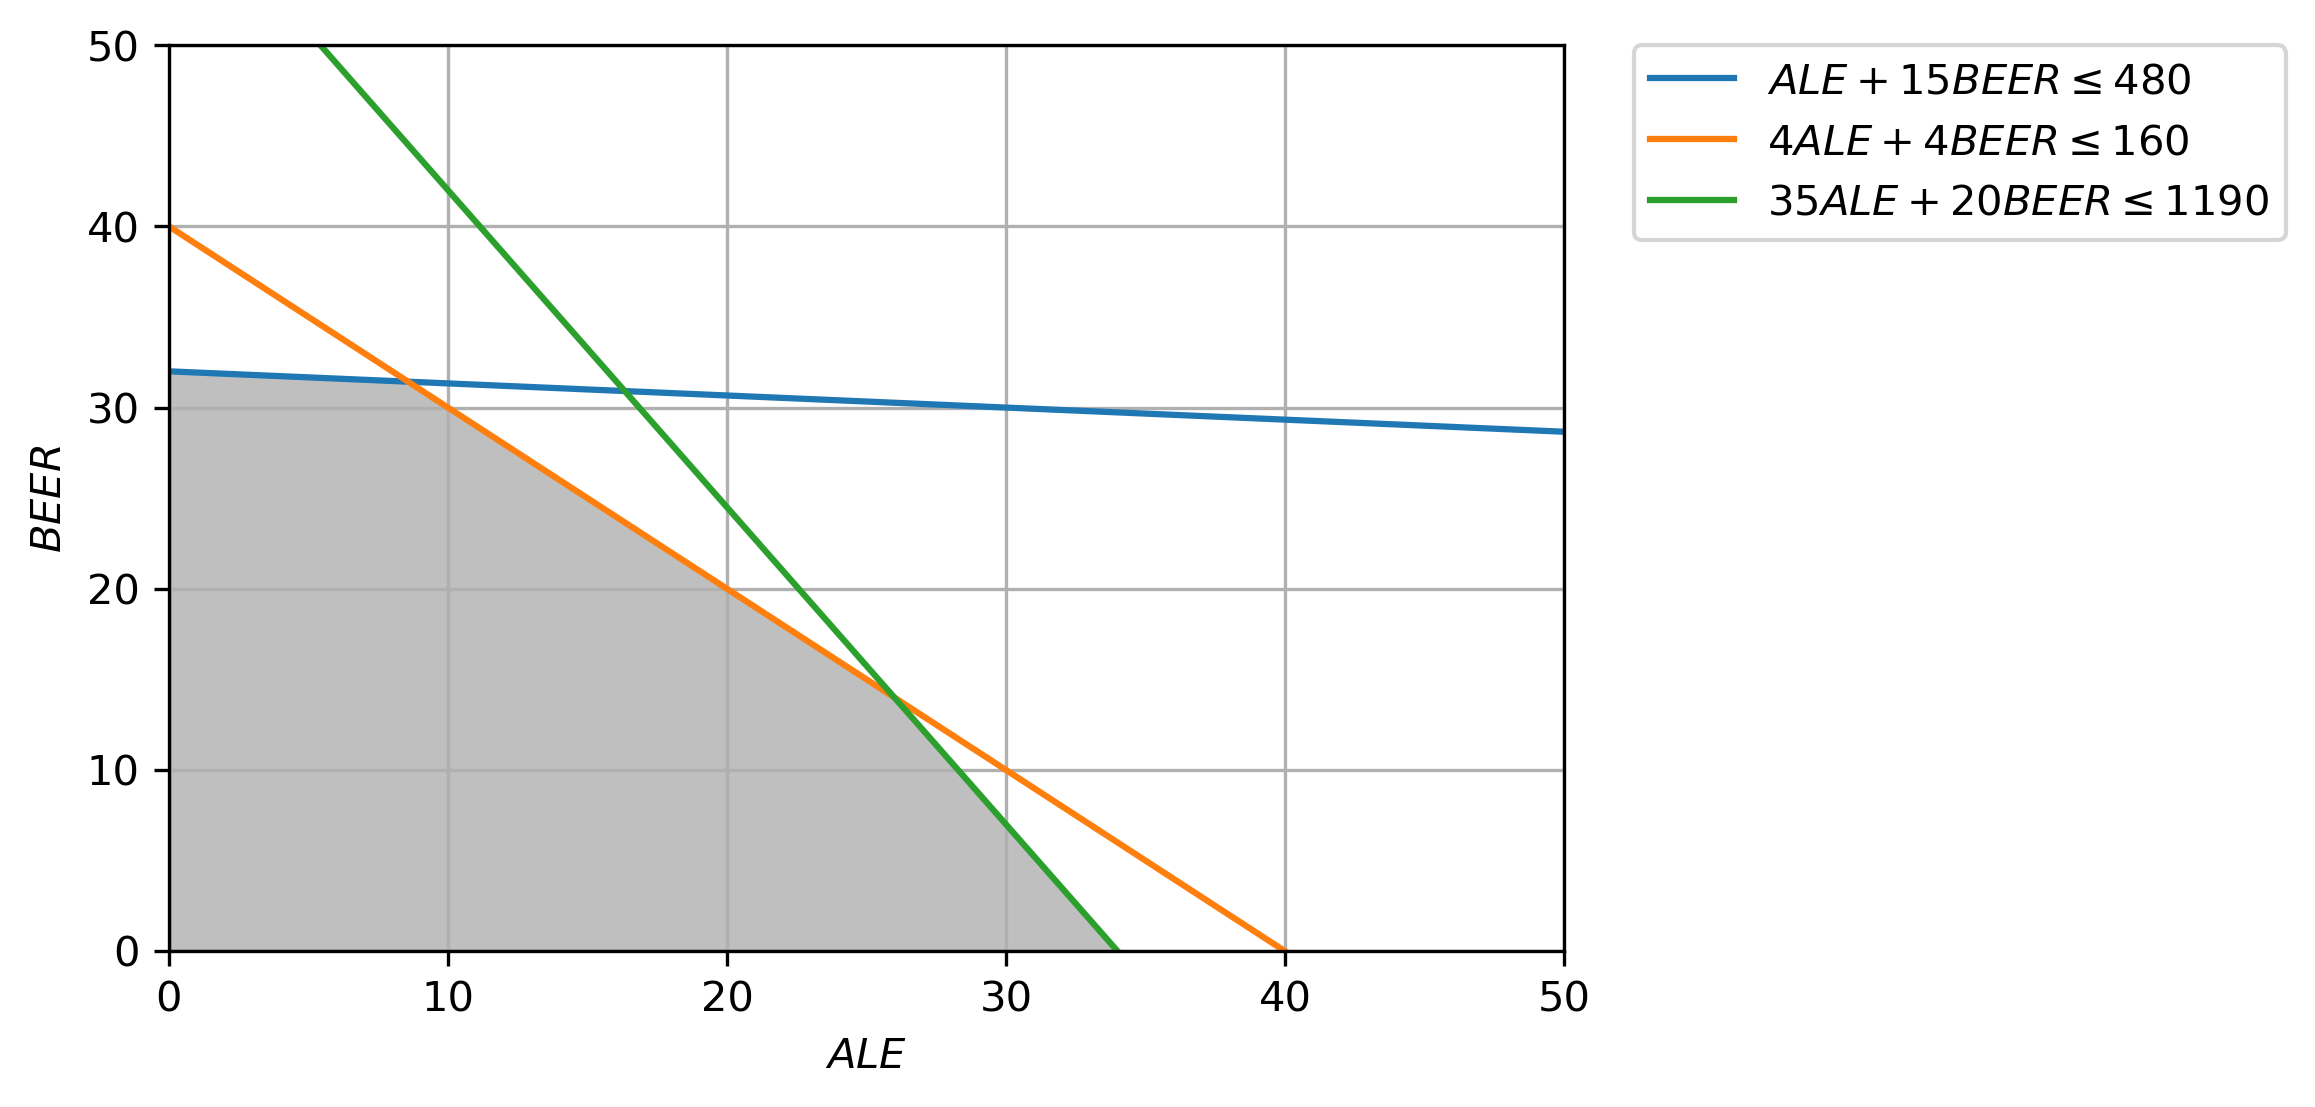

<IPython.core.display.Javascript object>

In [20]:
# Construct lines
ALE = np.linspace(0, 50, 2000)  # ALE >= 0
BEER_1 = lambda ALE: (480 - ALE) / 15  # constraint 1: 𝐴𝐿𝐸 + 15𝐵𝐸𝐸𝑅 ≤ 480
BEER_2 = lambda ALE: (160 - 4 * ALE) / 4  # constraint 2: 4𝐴𝐿𝐸 + 4𝐵𝐸𝐸𝑅 ≤ 160
BEER_3 = lambda ALE: (1190 - 35 * ALE) / 20  # constraint 3: 35𝐴𝐿𝐸 + 20𝐵𝐸𝐸𝑅 ≤ 1190

# Make plot
plt.plot(ALE, BEER_1(ALE), label=r"$ALE + 15 BEER \leq 480$")
plt.plot(ALE, BEER_2(ALE), label=r"$4 ALE + 4 BEER \leq 160$")
plt.plot(ALE, BEER_3(ALE), label=r"$35 ALE + 20 BEER \leq 1190$")
plt.xlim((0, 50))
plt.ylim((0, 50))
plt.xlabel(r"$ALE$")
plt.ylabel(r"$BEER$")

# Fill feasible region
y = np.minimum(np.minimum(BEER_1(ALE), BEER_2(ALE)), BEER_3(ALE))
x = np.zeros(len(ALE))
plt.fill_between(ALE, x, y, where=y > x, color="grey", alpha=0.5)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

The feasible region is the polyhedron above that is shaded, enclosed by all 3 constraints.

(b) On the same graph plot the set of points where the objective function value equals 750. Are any of these points optimal? Why?

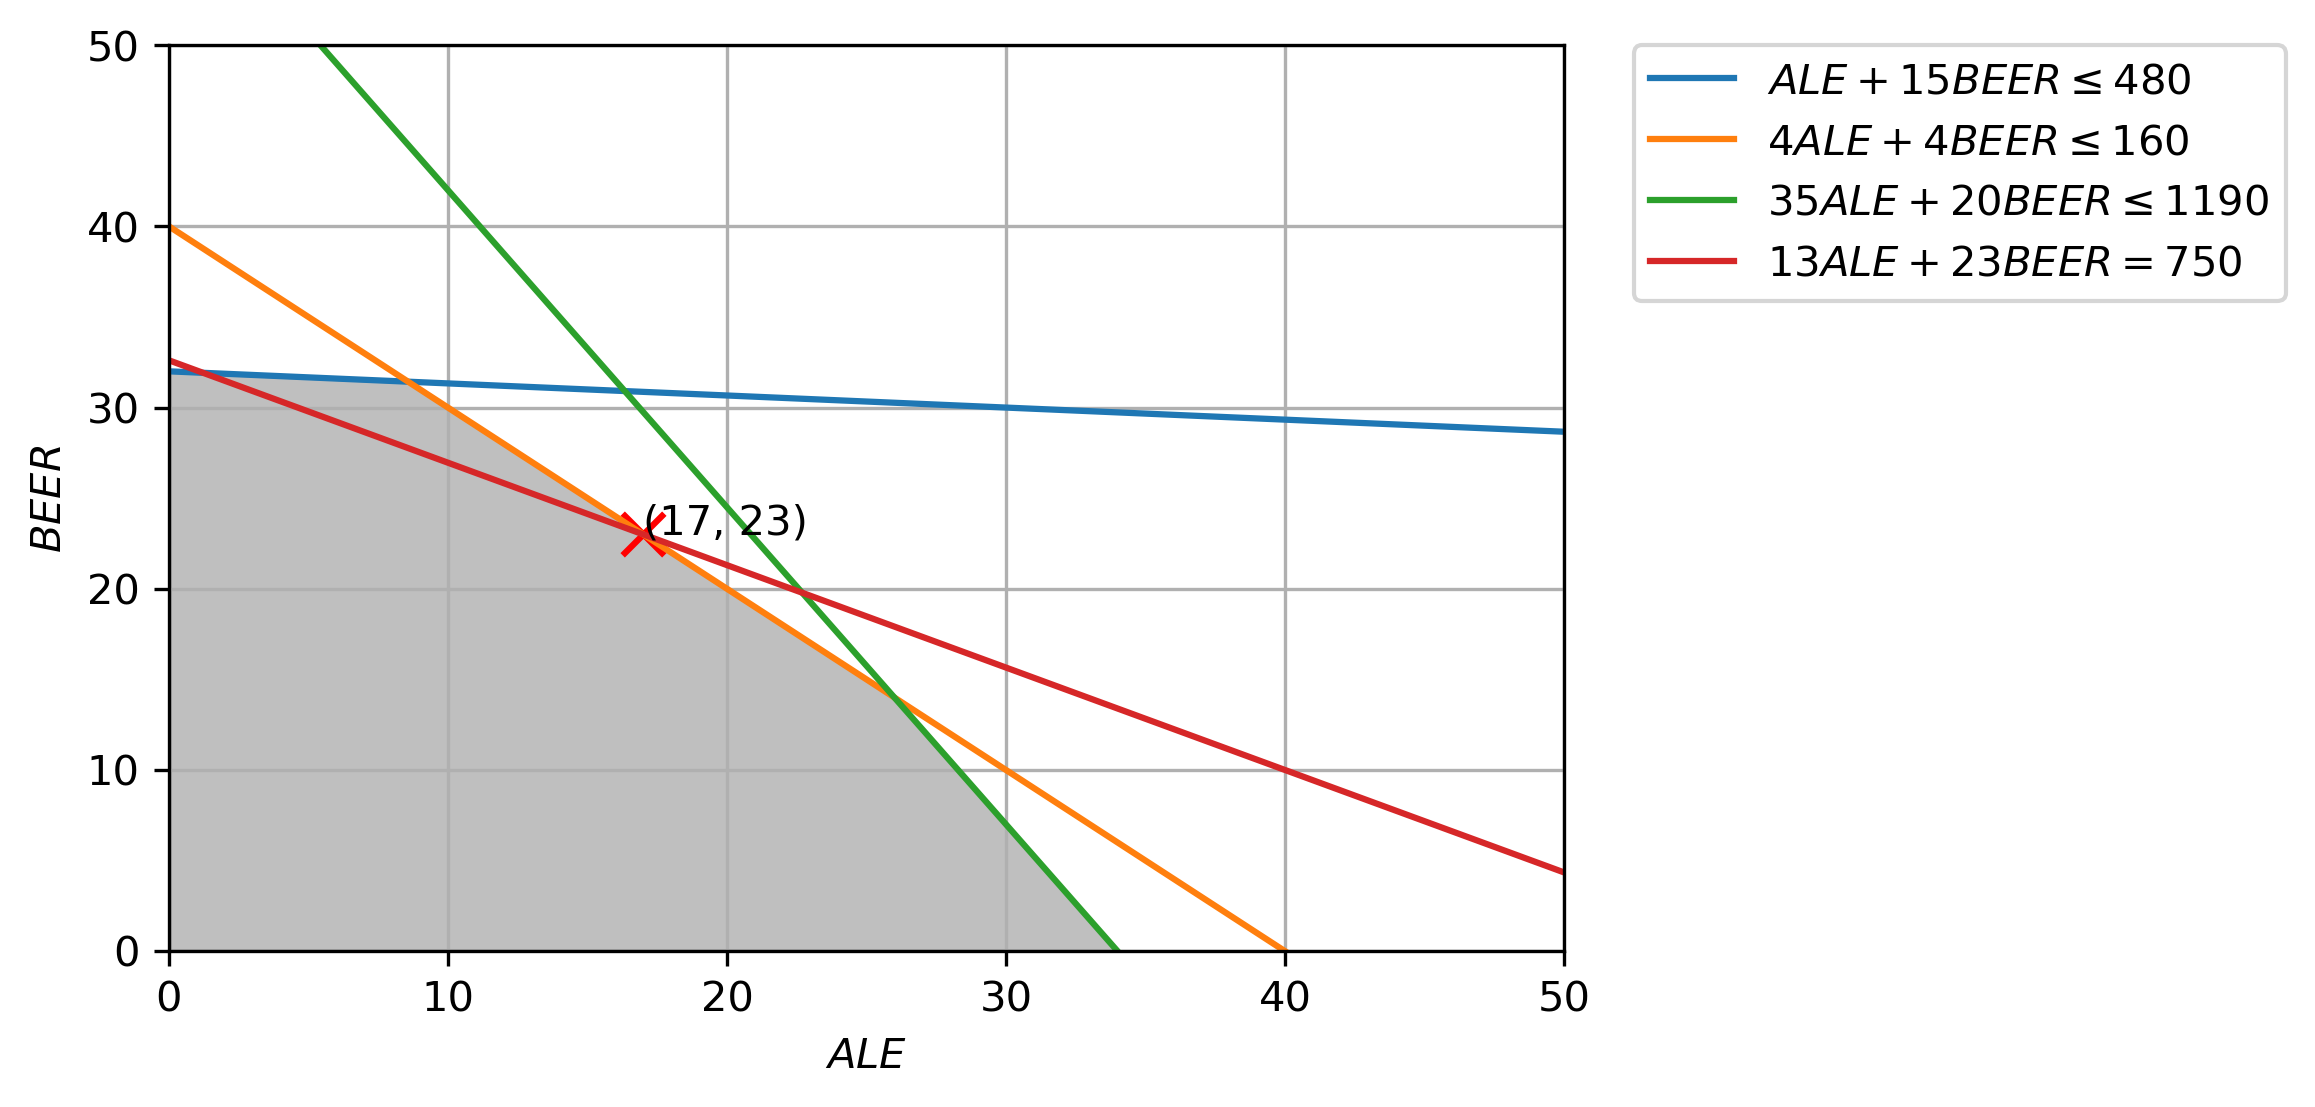

<IPython.core.display.Javascript object>

In [21]:
# Construct lines
ALE = np.linspace(0, 50, 2000)  # ALE >= 0
BEER_1 = lambda ALE: (480 - ALE) / 15  # constraint 1: 𝐴𝐿𝐸 + 15𝐵𝐸𝐸𝑅 ≤ 480
BEER_2 = lambda ALE: (160 - 4 * ALE) / 4  # constraint 2: 4𝐴𝐿𝐸 + 4𝐵𝐸𝐸𝑅 ≤ 160
BEER_3 = lambda ALE: (1190 - 35 * ALE) / 20  # constraint 3: 35𝐴𝐿𝐸 + 20𝐵𝐸𝐸𝑅 ≤ 1190
BEER_4 = lambda ALE: (750 - 13 * ALE) / 23  # obj. fn: 13 𝐴𝐿𝐸 + 23 𝐵𝐸𝐸𝑅 = 750

# Make plot
plt.plot(ALE, BEER_1(ALE), label=r"$ALE + 15 BEER \leq 480$")
plt.plot(ALE, BEER_2(ALE), label=r"$4 ALE + 4 BEER \leq 160$")
plt.plot(ALE, BEER_3(ALE), label=r"$35 ALE + 20 BEER \leq 1190$")
plt.plot(ALE, BEER_4(ALE), label=r"$13 ALE + 23 BEER = 750$")
plt.xlim((0, 50))
plt.ylim((0, 50))
plt.xlabel(r"$ALE$")
plt.ylabel(r"$BEER$")

# Fill feasible region
y = np.minimum(np.minimum(BEER_1(ALE), BEER_2(ALE)), BEER_3(ALE))
x = np.zeros(len(ALE))
plt.fill_between(ALE, x, y, where=y > x, color="grey", alpha=0.5)

feasible_x_750, feasible_y_750 = list(
    zip(
        *[
            (ale, beer)
            for ale in np.arange(0, 40, 1)
            for beer in np.arange(0, 40, 1)
            if np.round(13 * ale + 23 * beer) == 750
        ]
    )
)  # all integer points that are inside feasible region and obj fn = 750
plt.scatter(feasible_x_750, feasible_y_750, s=100, c="r", marker="x")
for x_i, y_i in zip(feasible_x_750, feasible_y_750):
    plt.text(x_i, y_i, s=f"({x_i}, {y_i})")

plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

ALE=17, BEER=23 is feasible. However, it is not the optimal. According to the fundamental theorem of linear programming, the maxima and minima of a linear function over a convex polygonal region occur at the region's corners. Since ALE=17, BEER=23 does not occur in any one of the vertices of the polyhedron, it is not an optimal point.

(c) Do the same for the objective function value 850. Are any of these points optimal? Why?

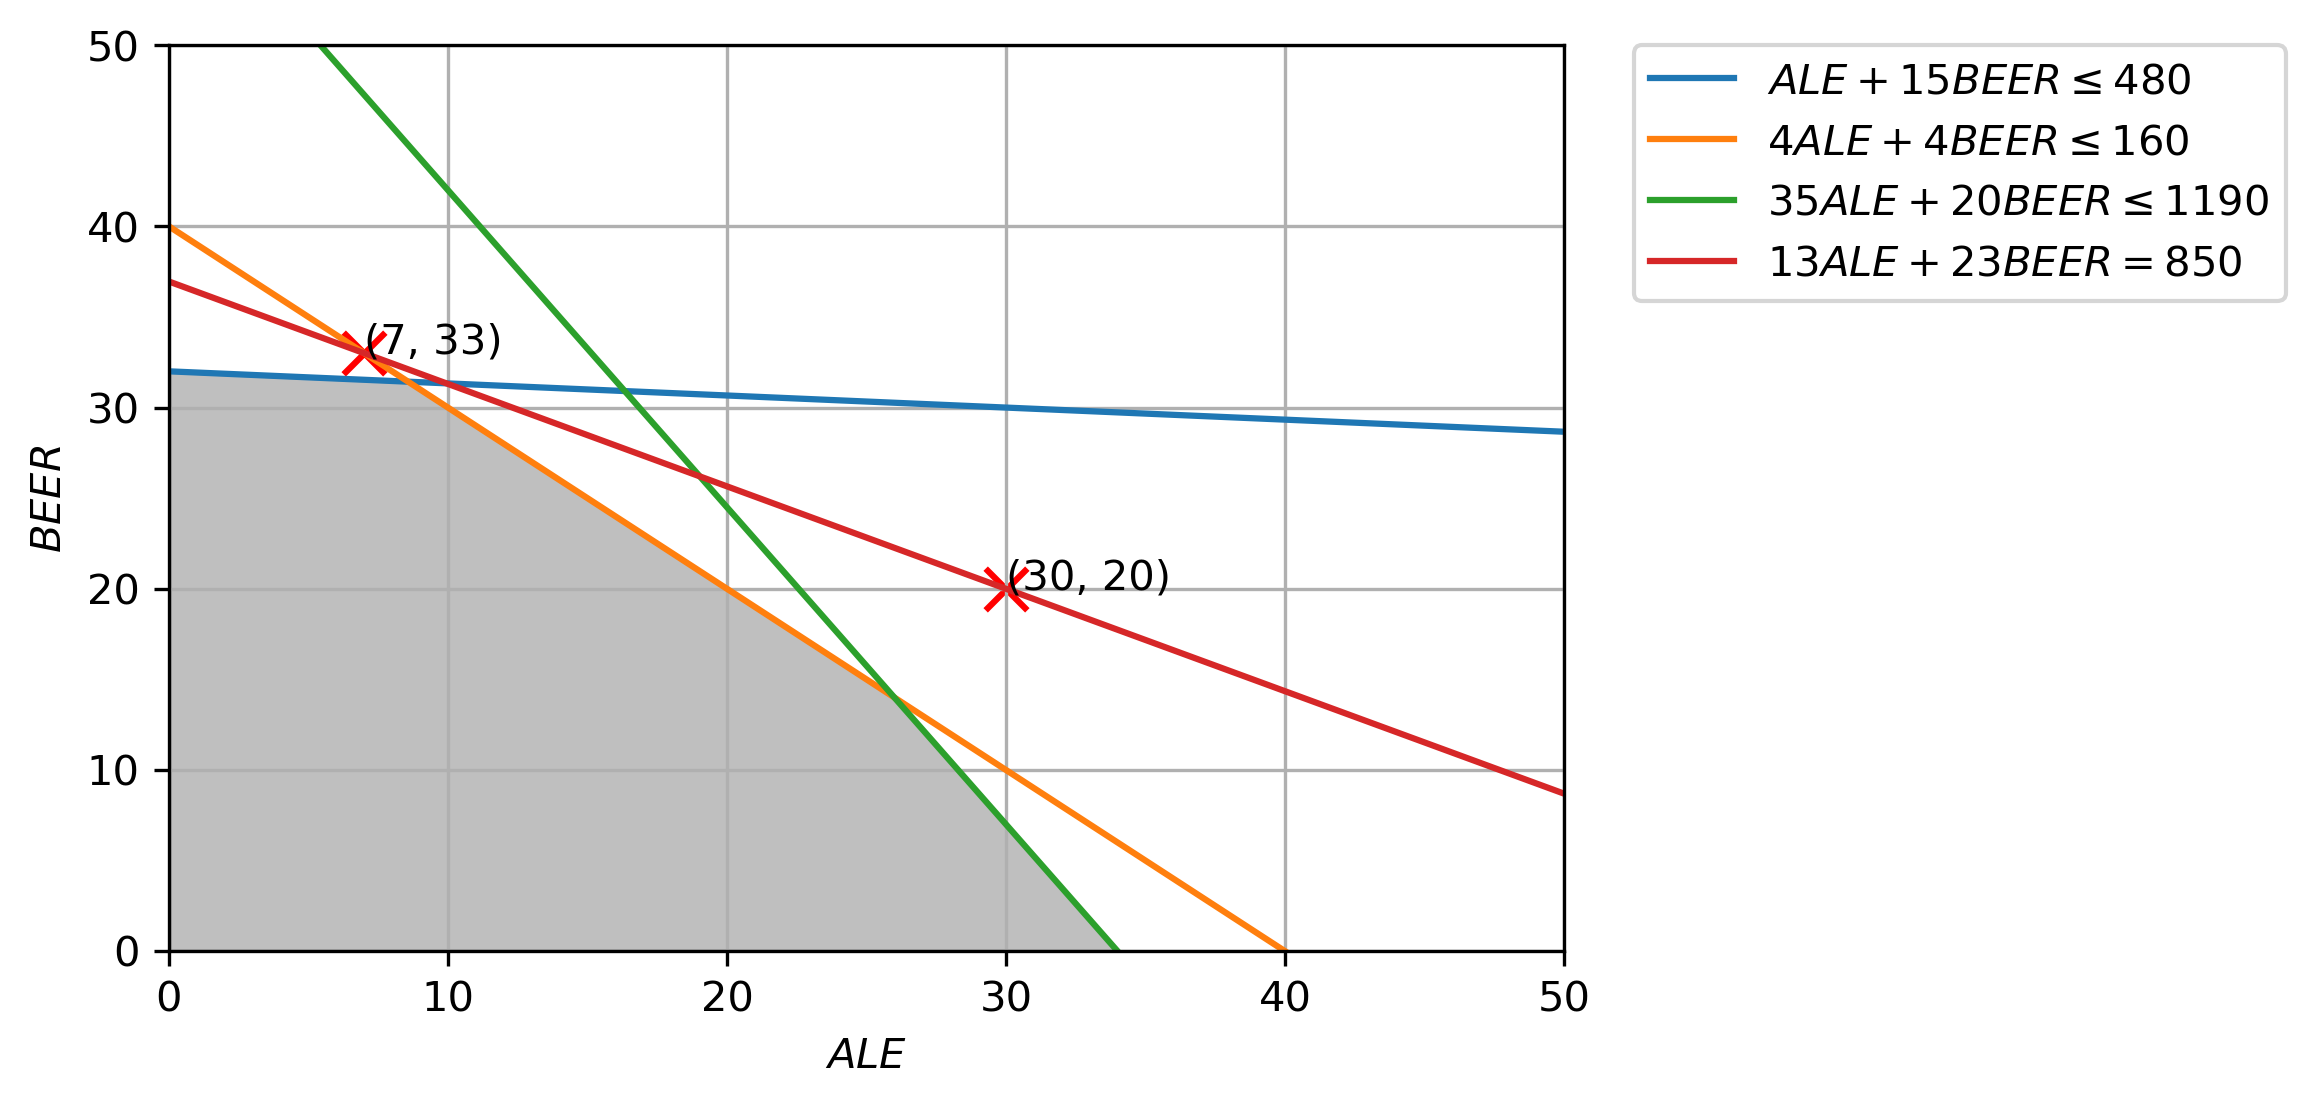

<IPython.core.display.Javascript object>

In [22]:
# Construct lines
ALE = np.linspace(0, 50, 2000)  # ALE >= 0
BEER_1 = lambda ALE: (480 - ALE) / 15  # constraint 1: 𝐴𝐿𝐸 + 15𝐵𝐸𝐸𝑅 ≤ 480
BEER_2 = lambda ALE: (160 - 4 * ALE) / 4  # constraint 2: 4𝐴𝐿𝐸 + 4𝐵𝐸𝐸𝑅 ≤ 160
BEER_3 = lambda ALE: (1190 - 35 * ALE) / 20  # constraint 3: 35𝐴𝐿𝐸 + 20𝐵𝐸𝐸𝑅 ≤ 1190
BEER_4 = lambda ALE: (850 - 13 * ALE) / 23  # obj. fn: 13 𝐴𝐿𝐸 + 23 𝐵𝐸𝐸𝑅 = 850

# Make plot
plt.plot(ALE, BEER_1(ALE), label=r"$ALE + 15 BEER \leq 480$")
plt.plot(ALE, BEER_2(ALE), label=r"$4 ALE + 4 BEER \leq 160$")
plt.plot(ALE, BEER_3(ALE), label=r"$35 ALE + 20 BEER \leq 1190$")
plt.plot(ALE, BEER_4(ALE), label=r"$13 ALE + 23 BEER = 850$")
plt.xlim((0, 50))
plt.ylim((0, 50))
plt.xlabel(r"$ALE$")
plt.ylabel(r"$BEER$")

# Fill feasible region
y = np.minimum(np.minimum(BEER_1(ALE), BEER_2(ALE)), BEER_3(ALE))
x = np.zeros(len(ALE))
plt.fill_between(ALE, x, y, where=y > x, color="grey", alpha=0.5)

feasible_x_850, feasible_y_850 = list(
    zip(
        *[
            (ale, beer)
            for ale in np.arange(0, 40, 1)
            for beer in np.arange(0, 40, 1)
            if np.round(13 * ale + 23 * beer) == 850
        ]
    )
)  # all integer points that are inside feasible region and obj fn = 850
plt.scatter(feasible_x_850, feasible_y_850, s=100, c="r", marker="x")
for x_i, y_i in zip(feasible_x_850, feasible_y_850):
    plt.text(x_i, y_i, s=f"({x_i}, {y_i})")

plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

Unfortunately, none of the points on the $13 ALE + 23 BEER = 850$ satisfy the constraints of the LPP, and hence, none are optimal.

### 2.6

The following table gives data for an experiment in which the linear model

$$ b = a_1x_1 + a_2x_2 + a_3x_3 $$

is postulated

<img src="./assets/hw1-2_6.png" />

Write down the linear program for the associated Chebyshev problem.
(You need not convert the LP to standard form for this exercise.)

Linear Program:

\begin{align}
    \underset{x_1, x_2, x_3, t}{\text{minimize }} &t \\
    \text{subject to } 
    &t - (14.92x_1-19.89x_2+10.66x_3-985.62) \geq 0 \\
    &t + (14.92x_1-19.89x_2+10.66x_3-985.62) \geq 0 \\
    &t - (17.76x_1+9.16x_2+18.29x_3-846.21) \geq 0 \\
    &t + (17.76x_1+9.16x_2+18.29x_3-846.21) \geq 0 \\
    &t - (16.45x_1-23.07x_2+15.77x_3-742.67) \geq 0 \\
    &t + (16.45x_1-23.07x_2+15.77x_3-742.67) \geq 0 \\
    &t - (15.93x_1+12.04x_2+16.85x_3-780.32) \geq 0 \\
    &t + (15.93x_1+12.04x_2+16.85x_3-780.32) \geq 0 \\
    &t - (13.99x_1+10.47x_2+19.55x_3-689.62) \geq 0 \\
    &t + (13.99x_1+10.47x_2+19.55x_3-689.62) \geq 0 \\
    &\text{and } t \geq 0\\
\end{align}

In [23]:
# Create optimization variables
t_x = cp.Variable((4,), integer=False)

# Create constraints.
constraints = [
    np.array(
        [
            [1, -14.92, 19.89, -10.66,],
            [1, 14.92, -19.89, 10.66,],
            [1, -17.76, -9.16, -18.29,],
            [1, 17.76, 9.16, 18.29,],
            [1, -16.45, 23.07, -15.77,],
            [1, 16.45, -23.07, 15.77,],
            [1, -15.93, -12.04, -16.85,],
            [1, 15.93, 12.04, 16.85,],
            [1, -13.99, -10.47, -19.55,],
            [1, 13.99, 10.47, 19.55,],
        ]
    )
    @ t_x
    >= np.array(
        [
            -985.62,
            985.62,
            -846.21,
            846.21,
            -742.67,
            742.67,
            -780.32,
            780.32,
            -689.62,
            689.62,
        ]
    ),
    t_x[0] >= 0,
]

# Form objective.
obj = cp.Minimize(t_x[0])

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in t_x[1:].value]}")

Linear Programming Solution
Status: optimal
The optimal value is: 101.09
The optimal solution is: x = [85.22, 2.26, -32.09]


<IPython.core.display.Javascript object>

### 2.12

In the text it is asserted that for any $(b_1, b_2, b_3)$ the vectors $(1, 1, 1), (0, 1, 1), (0, 0, 1),$ and $(b_1, b_2, b_3)$ are linearly dependent. 

Denote these vectors by $v^1, v^2, v^3, v^4,$ respectively, and find a set of scalar coefficients $\alpha_1, \alpha_2, \alpha_3, \alpha_4$ such that $\alpha_1v^1 + \alpha_2v^2 + \alpha_3v^3 + \alpha_4v^4 = 0$.

How many such sets of coefficients are there in this case?

\begin{align}
    \begin{bmatrix}
        \vert & \vert & \vert & \vert \\
        v^1 & v^2 & v^3 & v^4 \\
        \vert & \vert & \vert & \vert \\
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
        \alpha_1 \\
        \alpha_2 \\
        \alpha_3 \\
        \alpha_4 \\
    \end{bmatrix}
    &= \vec{0} \\
    \[
        \left[
        \begin{array}{cccc|c}
            1 & 0 & 0 & b_1 & 0 \\
            1 & 1 & 0 & b_2 & 0 \\
            1 & 1 & 1 & b_3 & 0 \\
        \end{array}
        \right]
    \] 
    &\xrightarrow{\text{Elementary Row Operations}} 
    \stackrel{\hbox{Reduced Row Echelon Form}\\}{
    \underbrace{
    \[
        \left[
        \begin{array}{cccc|c}
            1 & 0 & 0 & b_1 & 0 \\
            0 & 1 & 0 & b_2 - b_1 & 0 \\
            0 & 0 & 1 & b_3 - b_2 & 0 \\
        \end{array}
        \right]
    \]
    }_{\text{3 Pivots, 1 Free Variable for }\alpha_4}
    } \\
    \text{Let }\alpha_4 &= s \because \alpha_4 \text{ is a free variable}, \\
    \alpha_1 + \alpha_4b_1 &= 0 \,\,\rightarrow\,\, \alpha_1 = -sb_1 \\
    \alpha_2 + \alpha_4(b_2-b_1) &= 0 \,\,\rightarrow\,\, \alpha_2 = -s(b_2-b_1) \\
    \alpha_3 + \alpha_4(b_3-b_2) &= 0 \,\,\rightarrow\,\, \alpha_3 = -s(b_3-b_2) \\
    \\
    \begin{bmatrix}
        \alpha_1 \\
        \alpha_2 \\
        \alpha_3 \\
        \alpha_4 \\
    \end{bmatrix}
    &=
    s
    \begin{bmatrix}
        -b_1 \\
        -(b_2-b_1) \\
        -(b_3-b_2) \\
        1 \\
    \end{bmatrix}
\end{align}

Since $s$ can take on any values, there are infinitely many solutions possible for the Underdetermined system of linear equations above, and hence, infinitely many possible sets of $\alpha_i, i\in[1, 4]$ are possible as long as the vector of coefficients are a scalar multiple of $(-b_1, -(b_2-b_1), -(b_3-b_2), 1)$.

### 2.15

Consider the linear program

$$
\begin{align}
    \text{maximize } &4x_1 + x_2 \\
    \text{subject to } &x_1 − 3x_2 \leq 6 \\
    &x_1 + 2x_2 \leq 4 \\
    &\text{and } x_1, x_2 \geq 0\\
\end{align}
$$

(a) Plot the feasible region of the above linear program.

In [24]:
# Create one vector optimization variable.
x = cp.Variable((2,), integer=True)

# Create constraints.
constraints = [
    np.array([[1, -3], [1, 2]]) @ x <= np.array([6, 4]),
    x >= 0,
]

# Form objective.
obj = cp.Maximize(np.array([4, 1]) @ x)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")

Linear Programming Solution
Status: optimal
The optimal value is: 16.0
The optimal solution is: x = [4.0, 0.0]


<IPython.core.display.Javascript object>

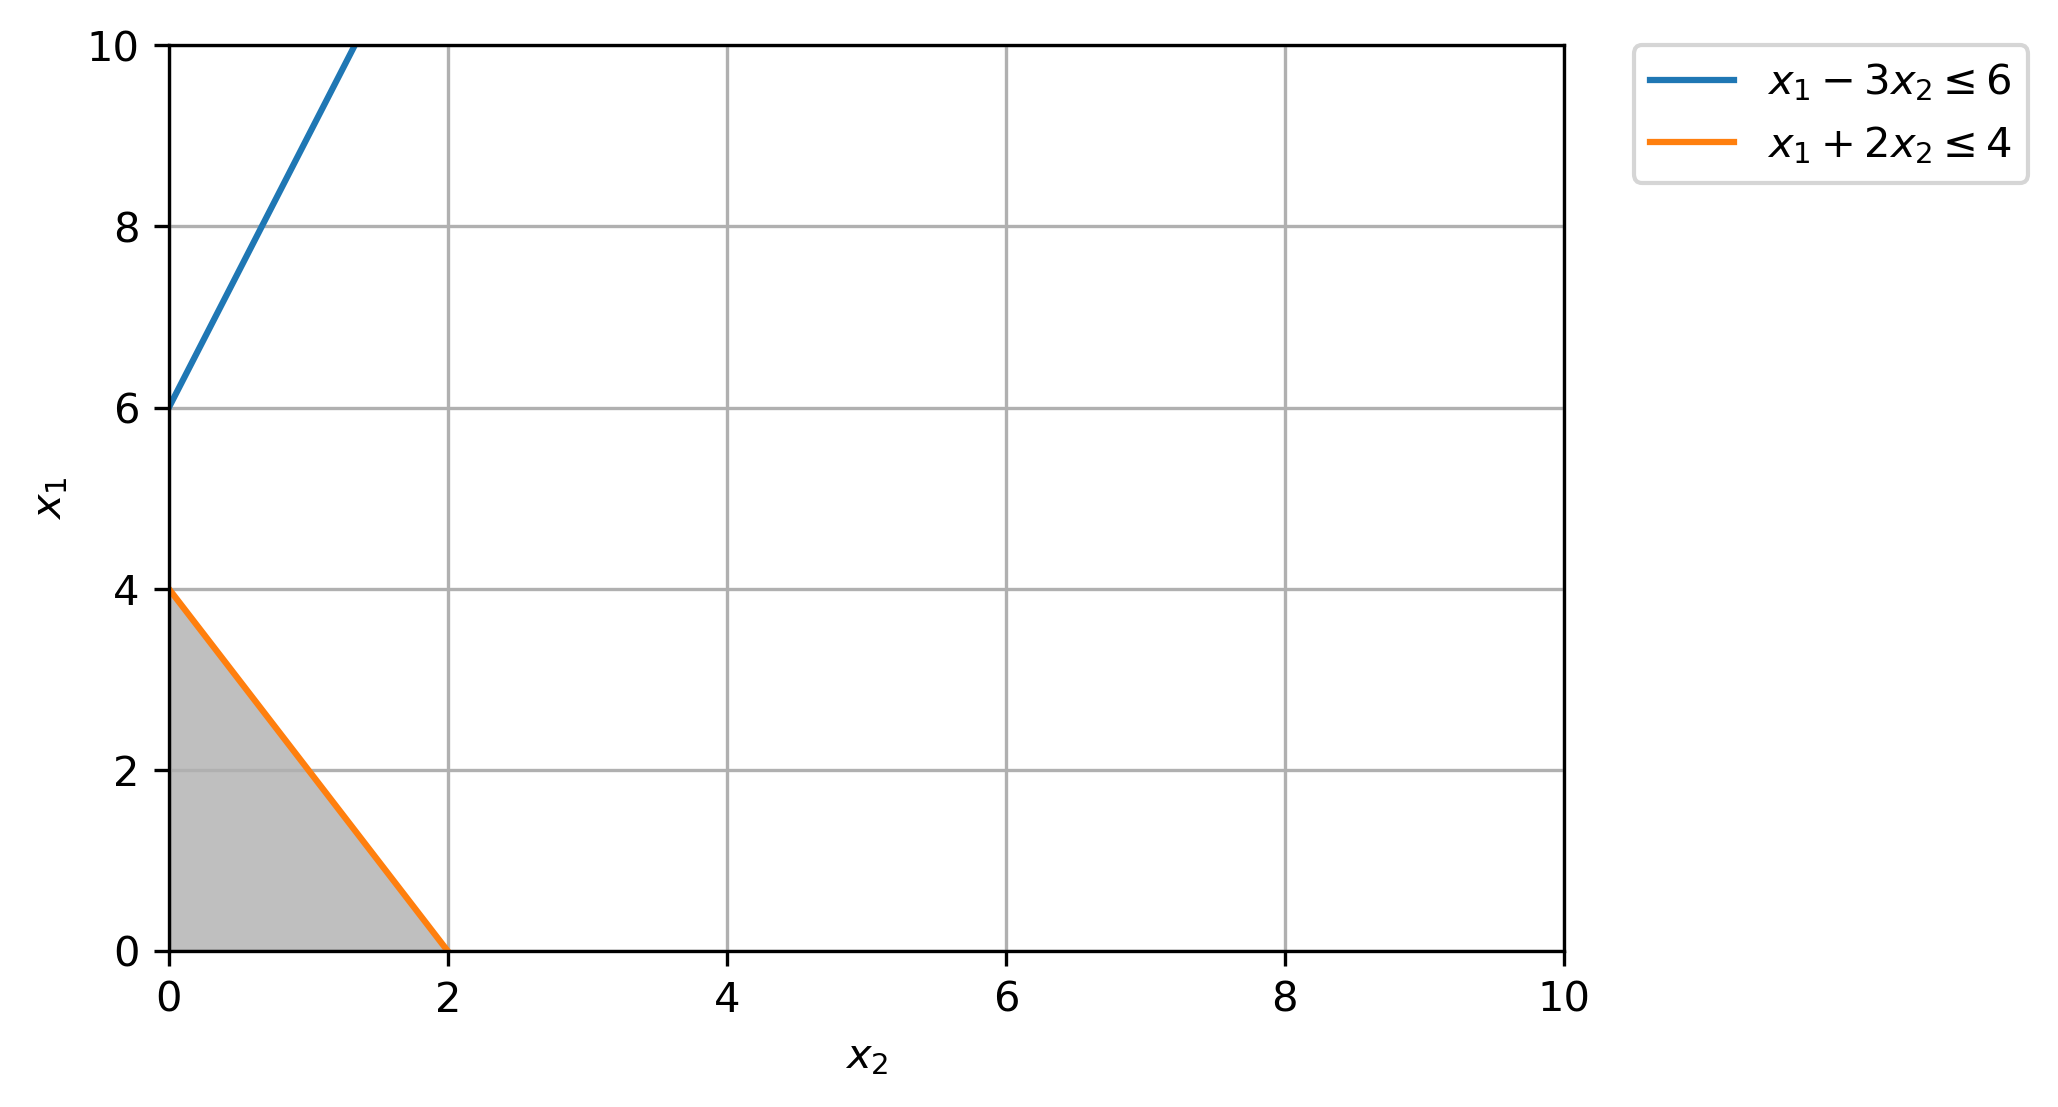

<IPython.core.display.Javascript object>

In [25]:
# Construct lines
x_2 = np.linspace(0, 20, 2000)  # x_2 >= 0
x_1_1 = lambda x_2: 6 + 3 * x_2  # constraint 1: 𝑥1 − 3𝑥2 ≤ 6
x_1_2 = lambda x_2: 4 - 2 * x_2  # 𝑥1 + 2𝑥2 ≤ 4

# Make plot
plt.plot(x_2, x_1_1(x_2), label=r"$x_1 - 3x_2 \leq 6$")
plt.plot(x_2, x_1_2(x_2), label=r"$x_1 + 2x_2 \leq 4$")
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.xlabel(r"$x_2$")
plt.ylabel(r"$x_1$")

# Fill feasible region
y = np.minimum(x_1_1(x_2), x_1_2(x_2))
x = np.zeros(len(x_2))
plt.fill_between(x_2, x, y, where=y > x, color="grey", alpha=0.5)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

(b) List all the extreme points of the feasible region.

1. $(x_1=0, x_2=0)$
2. $(x_1=4, x_2=0)$ 
3. $(x_1=0, x_2=2)$

(c) Write the equivalent standard form as defined in (1.1).

Define:

\begin{equation*}
    \underbrace{
        A = 
        \begin{pmatrix}
        1 & -3 & 1 & 0 \\
        1 & 2 & 0 & 1 \\
        \end{pmatrix}
    }_{\text{Detached Coefficient Matrix}}
    \,\,,\,\,
    \underbrace{
        \mathbf{x} = 
        \begin{pmatrix}
        x_1 \\
        x_2 \\
        s_1 \\
        s_2 \\
        \end{pmatrix}
    }_{\text{Vector of Decision Variables and Slack Variables}}
    \,\,,\,\,
    \underbrace{
        \mathbf{b} = 
        \begin{pmatrix}
        6 \\
        4 \\
        \end{pmatrix}
    }_{\text{Constraints}}
    \,\,,\,\,
    \underbrace{
        \mathbf{c} = 
        \begin{pmatrix}
        -4 \\
        -1 \\
        0 \\
        0 \\
        \end{pmatrix}
    }_{\text{Coefficients for Objective function}}
\end{equation*}

Linear Program:

\begin{align}
    \text{minimize } &\mathbf{c}^\top \mathbf{x} \\
    \text{subject to } &A\mathbf{x} = \mathbf{b} \\
    &\text{and } \mathbf{x} \geq 0\\
\end{align}

(d) Show that the extreme points are basic feasible solutions of the LP.

Definition 1. We say that a constraint $ax \leq b$ is active (or binding) at point $\bar{x}$ if $a\bar{x} = b$.

Definition 2. A solution in $P = {x : Ax \leq b}$ is called basic feasible if it has $n$ linearly independent active constraints.

1. $(x_1=0, x_2=0)$
    - Number of Active Constraints: 2
        - $x_1 − 3x_2 \leq 6 \rightarrow 0 \leq 6$
        - $x_1 + 2x_2 \leq 4 \rightarrow 0 \leq 4$
        - $x_1 \geq 0 \rightarrow 0 = 0$
        - $x_2 \geq 0 \rightarrow 0 = 0$   
2. $(x_1=4, x_2=0)$ 
    - Number of Active Constraints: 2
        - $x_1 − 3x_2 \leq 6 \rightarrow 4 \leq 6$
        - $x_1 + 2x_2 \leq 4 \rightarrow 4 = 4$
        - $x_1 \geq 0 \rightarrow 4 \geq 0$
        - $x_2 \geq 0 \rightarrow 0 = 0$
3. $(x_1=0, x_2=2)$
    - Number of Active Constraints: 2
        - $x_1 − 3x_2 \leq 6 \rightarrow -6 \leq 6$
        - $x_1 + 2x_2 \leq 4 \rightarrow 4 = 4$
        - $x_1 \geq 0 \rightarrow 0 = 0$
        - $x_2 \geq 0 \rightarrow 2 \geq 0$

Since all 3 extreme points have 2 linearly independent active constraints in a system of 2 decision variables, they are all basic feasible solutions.

(e) Evaluate the objective function at the extreme points and find the optimal extreme point solution.

1. $(x_1=0, x_2=0)$ Original Objective function value: 0
2. $(x_1=4, x_2=0)$ Original Objective function value: 16
3. $(x_1=0, x_2=2)$ Original Objective function value: 2

Hence, $(x_1=4, x_2=0)$ is the optimal extreme point.

(f) Modify the objective function so that the optimal solution is at a different extreme point.

$$
\begin{align}
    \text{maximize } &x_1 + 4x_2 \\
    \text{subject to } &x_1 − 3x_2 \leq 6 \\
    &x_1 + 2x_2 \leq 4 \\
    &\text{and } x_1, x_2 \geq 0\\
\end{align}
$$